<a href="https://colab.research.google.com/github/akanksha-ahuja/energy-economic-growth/blob/main/Sustainble_Energy_Consumption_1990_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives
- ability to deal with csv files ✅
- ability to produce a visualisation ✅
- making the visualisation available on a webpage ✅ 

Additional 
- a script with nlp/cv 
( Note: It can't be done on the same dataset: Both NLP and CV tasks require either long texts or images as input and all we have is numerical datasets. The numerical datasets are not multivairate otherwise you could build a regression model. ) 

## Data
- Primary Source: https://datacatalog.worldbank.org/search/dataset/0041706/Sustainable-Energy-for-All
- Other Sources: https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/abmi/pgdp#othertimeseries
- Other Sources: https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/abmi/pgdp#othertimeseries 



# Import Libs

In [1]:
# Import all libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Fix paths 
path_to_se = "/content/SE4ALLData.csv"
path_to_gdp_uk = "/content/series-051221_GDP_annual.csv"
path_to_gdp_rate_world = "/content/world_gdp.csv"

In [3]:
# Read all csv files here # Sustainable Energy for all 
df = pd.read_csv(path_to_se)

# Save all countries  - inspect which countries are available 
df['Country Name'].drop_duplicates().to_csv("countries.csv")

# Inspect the variables available
df_UK = df[df['Country Name']=='United Kingdom']
df_UK['Indicator Name']

2706    Access to Clean Fuels and Technologies for coo...
2707    Access to electricity (% of rural population w...
2708        Access to electricity (% of total population)
2709    Access to electricity (% of urban population w...
2710    Energy intensity level of primary energy (MJ/2...
2711                   Renewable electricity output (GWh)
2712    Renewable electricity share of total electrici...
2713                    Renewable energy consumption (TJ)
2714                   Renewable energy share of TFEC (%)
2715                       Total electricity output (GWh)
2716           Total final energy consumption (TFEC) (TJ)
Name: Indicator Name, dtype: object

### **What can we visualise?**
- Access to electricity in UK and India ✅
- Reneweable Energy Consumption vs Total Enegery Consumption over years ✅
- Access to electricity in rural and urban over years ✅
- Total Energy Consumption and GDP (annual GDP taken from 1990 to 2016) ✅
- Access to electricity in UK and Access to electricity in X, Y, Z countries ✅

# Countries

In [4]:
def load_se_data(path_to_se):
  df = pd.read_csv(path_to_se)
  return df

In [5]:
def get_all_countries(df):
  df_India = df[df['Country Name']=='India']
  df_UK = df[df['Country Name']=='United Kingdom']
  df_France = df[df['Country Name']=='France']
  df_USA = df[df['Country Name']=='United States']
  df_Pakistan = df[df['Country Name']=='Pakistan']
  df_Zambia = df[df['Country Name']=='Zambia']
  df_SA = df[df['Country Name']=='South Africa']
  df_Rwanda = df[df['Country Name']=='Rwanda']
  df_Peru = df[df['Country Name']=='Peru']
  df_Nepal = df[df['Country Name']=='Nepal']
  df_Mexico = df[df['Country Name']=='Mexico']
  df_Iraq = df[df['Country Name']=='Iraq']
  df_Iceland = df[df['Country Name']=='Iceland']
  df_Ghana = df[df['Country Name']=='Ghana']
  return df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana

In [6]:
def get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name='Access to electricity (% of total population)', se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"]):
  # Convert to numpy for plotting 
  np_India = df_India[df_India['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_UK = df_UK[df_UK['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_France = df_France[df_France['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_USA = df_USA[df_USA['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Pakistan = df_Pakistan[df_Pakistan['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Zambia = df_Zambia[df_Zambia['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_SA = df_SA[df_SA['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Rwanda = df_Rwanda[df_Rwanda['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Peru = df_Peru[df_Peru['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Nepal = df_Nepal[df_Nepal['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Mexico = df_Mexico[df_Mexico['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Iraq = df_Iraq[df_Iraq['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Iceland = df_Iceland[df_Iceland['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  np_Ghana = df_Ghana[df_Ghana['Indicator Name'] == indicator_name].drop(columns= se_columns_dropped_list, axis=1).to_numpy()
  return np_India, np_UK, np_France, np_USA, np_Pakistan, np_Zambia, np_SA, np_Rwanda, np_Peru, np_Nepal, np_Mexico, np_Iraq, np_Iceland, np_Ghana

In [7]:
# Calling all functions for dataframes and np of selected countries 
df = load_se_data(path_to_se)
df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana = get_all_countries(df)
np_India, np_UK, np_France, np_USA, np_Pakistan, np_Zambia, np_SA, np_Rwanda, np_Peru, np_Nepal, np_Mexico, np_Iraq, np_Iceland, np_Ghana = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name='Access to electricity (% of total population)', se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])

# Plot: Accesibility to Electricity 

In [8]:
# The time for the dataset (x axis)
x_time = [x for x in range(1990, 2017, 1)]

In [9]:
def plot_regression(country_indicator_list, country_name_list, x_time, plot_title='Accesibility to Electricity in Countries', xlabel='Year', ylabel='Percentage'):
  # regression plot using seaborn
  fig = plt.figure(figsize=(10, 7))
  sns.regplot(x=x_time, y=country_indicator_list[0], color='blue', marker='+', label=country_name_list[0])
  sns.regplot(x=x_time, y=country_indicator_list[1], color='red', marker='+', label=country_name_list[1])
  sns.regplot(x=x_time, y=country_indicator_list[2], color='green', marker='+', label=country_name_list[2])
  sns.regplot(x=x_time, y=country_indicator_list[3], color='orange', marker='+', label=country_name_list[3])
  sns.regplot(x=x_time, y=country_indicator_list[4], color='purple', marker='+', label=country_name_list[4])
  sns.regplot(x=x_time, y=country_indicator_list[5], color='magenta', marker='+', label=country_name_list[5])
  plt.legend()
  plt.title(plot_title, size=24)
  plt.xlabel(xlabel, size=18)
  plt.ylabel(ylabel, size=18)
  plt.savefig("test1.png",dpi=100);


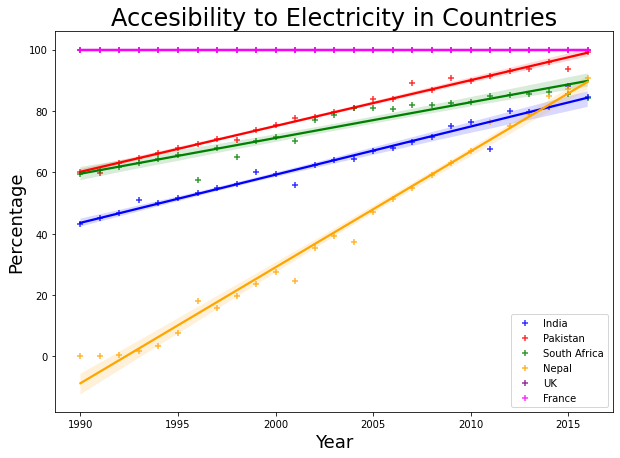

In [10]:
# Plotting for "India", "Pakistan", "South Africa", "Nepal", "UK", "France"
country_indicator_list = [np_India[0], np_Pakistan[0], np_SA[0], np_Nepal[0], np_UK[0], np_France[0]]
country_name_list = ["India", "Pakistan", "South Africa", "Nepal", "UK", "France"]
plot_regression(country_indicator_list, country_name_list, x_time, plot_title='Accesibility to Electricity in Countries', xlabel='Year', ylabel='Percentage')



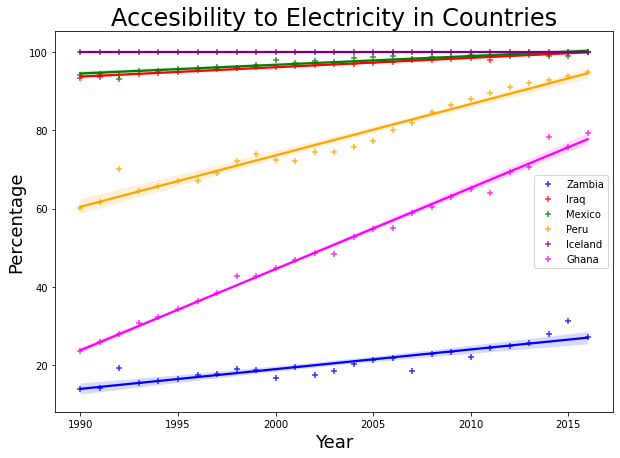

In [11]:
# Plotting for "Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana"
country_indicator_list = [np_Zambia[0], np_Iraq[0], np_Mexico[0], np_Peru[0], np_Iceland[0], np_Ghana[0]]
country_name_list = ["Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana"]
plot_regression(country_indicator_list, country_name_list, x_time, plot_title='Accesibility to Electricity in Countries', xlabel='Year', ylabel='Percentage')


# Plot: Renewable energy consumption (TJ)

In [12]:
# Convert to numpy for plotting 
np_India, np_UK, np_France, np_USA, np_Pakistan, np_Zambia, np_SA, np_Rwanda, np_Peru, np_Nepal, np_Mexico, np_Iraq, np_Iceland, np_Ghana = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name='Renewable energy consumption (TJ)', se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])

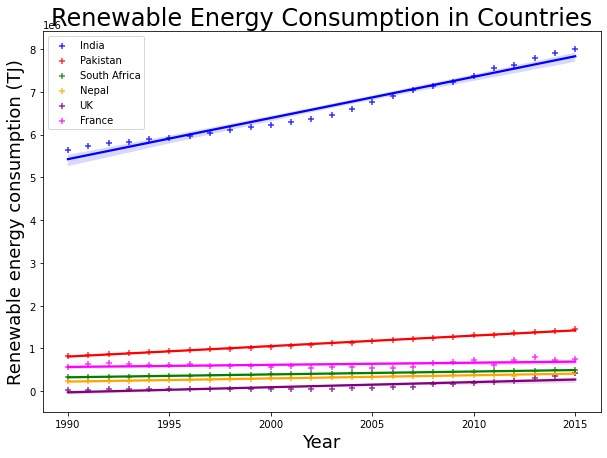

In [13]:
# Plotting for "India", "Pakistan", "South Africa", "Nepal", "UK", "France"
country_indicator_list = [np_India[0], np_Pakistan[0], np_SA[0], np_Nepal[0], np_UK[0], np_France[0]]
country_name_list = ["India", "Pakistan", "South Africa", "Nepal", "UK", "France"]
plot_regression(country_indicator_list, country_name_list, x_time, plot_title='Renewable Energy Consumption in Countries', xlabel='Year', ylabel='Renewable energy consumption (TJ)')


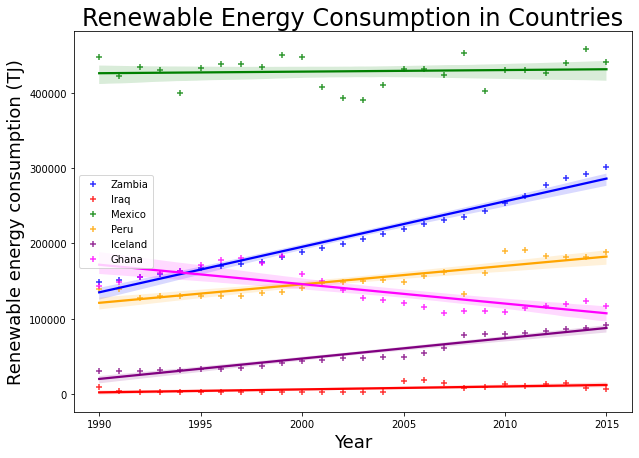

In [71]:

# Plotting for "Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana"
country_indicator_list = [np_Zambia[0], np_Iraq[0], np_Mexico[0], np_Peru[0], np_Iceland[0], np_Ghana[0]]
country_name_list = ["Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana"]
plot_regression(country_indicator_list, country_name_list, x_time, plot_title='Renewable Energy Consumption in Countries', xlabel='Year', ylabel='Renewable energy consumption (TJ)')


# Plot: Reneweable Energy Consumption vs Total Enegery Consumption over years

In [14]:
def get_renew_total_consumption(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_renew='Renewable energy consumption (TJ)',indicator_total='Total final energy consumption (TFEC) (TJ)'):
  np_India_renew, np_UK_renew, np_France_renew, np_USA_renew, np_Pakistan_renew, np_Zambia_renew, np_SA_renew, np_Rwanda_renew, np_Peru_renew, np_Nepal_renew, np_Mexico_renew, np_Iraq_renew, np_Iceland_renew, np_Ghana_renew = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name= indicator_renew, se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])
  np_India_total, np_UK_total, np_France_total, np_USA_total, np_Pakistan_total, np_Zambia_total, np_SA_total, np_Rwanda_total, np_Peru_total, np_Nepal_total, np_Mexico_total, np_Iraq_total, np_Iceland_total, np_Ghana_total = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name= indicator_total, se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])
  return np_India_renew, np_UK_renew, np_France_renew, np_USA_renew, np_Pakistan_renew, np_Zambia_renew, np_SA_renew, np_Rwanda_renew, np_Peru_renew, np_Nepal_renew, np_Mexico_renew, np_Iraq_renew, np_Iceland_renew, np_Ghana_renew, np_India_total, np_UK_total, np_France_total, np_USA_total, np_Pakistan_total, np_Zambia_total, np_SA_total, np_Rwanda_total, np_Peru_total, np_Nepal_total, np_Mexico_total, np_Iraq_total, np_Iceland_total, np_Ghana_total

In [15]:
def compare_renew_total_consumption_regression_plot(country_name, np_country_renew, np_country_total, title, xlabel,ylabel, label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)"):
  fig = plt.figure(figsize=(10, 7))
  sns.regplot(x=x_time, y=np_country_renew, color='blue', marker='+', label = country_name + label_renew)
  sns.regplot(x=x_time, y=np_country_total, color='red', marker='+', label = country_name + label_total)
  plt.legend()
  plt.title(title, size=24)
  plt.xlabel(xlabel, size=18)
  plt.ylabel(ylabel, size=18)
  plt.savefig("test2.png",dpi=100);

In [16]:
# Get all renew and total energies for all countries 
np_India_renew, np_UK_renew, np_France_renew, np_USA_renew, np_Pakistan_renew, np_Zambia_renew, np_SA_renew, np_Rwanda_renew, np_Peru_renew, np_Nepal_renew, np_Mexico_renew, np_Iraq_renew, np_Iceland_renew, np_Ghana_renew, np_India_total, np_UK_total, np_France_total, np_USA_total, np_Pakistan_total, np_Zambia_total, np_SA_total, np_Rwanda_total, np_Peru_total, np_Nepal_total, np_Mexico_total, np_Iraq_total, np_Iceland_total, np_Ghana_total = get_renew_total_consumption(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_renew='Renewable energy consumption (TJ)',indicator_total='Total final energy consumption (TFEC) (TJ)')

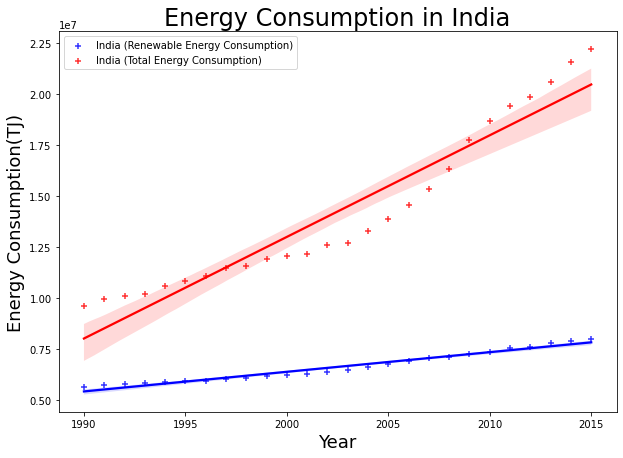

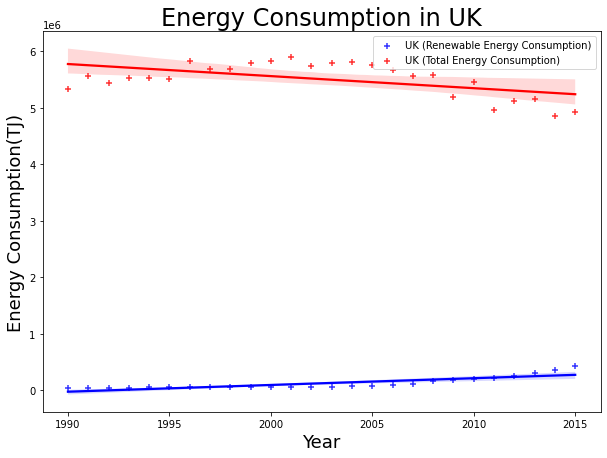

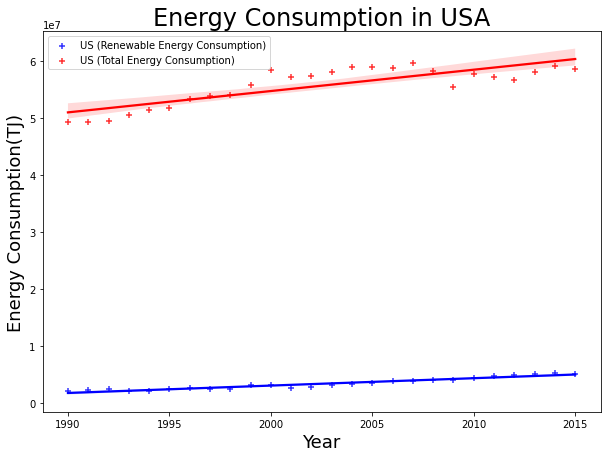

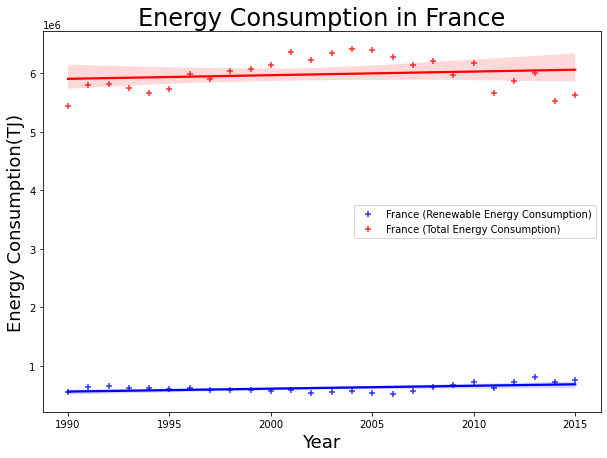

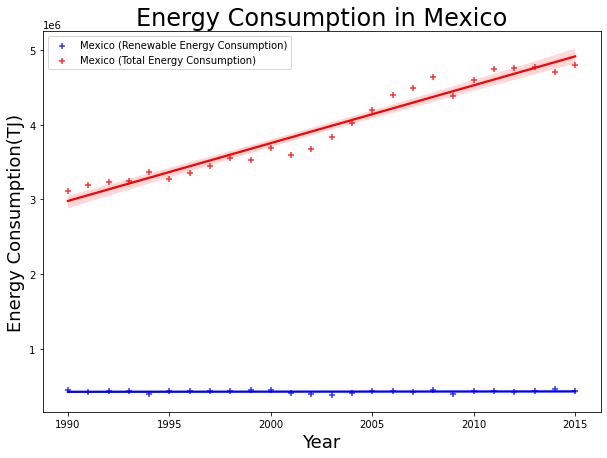

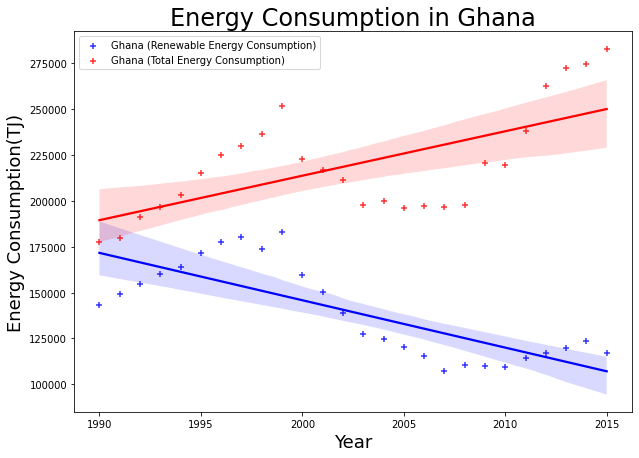

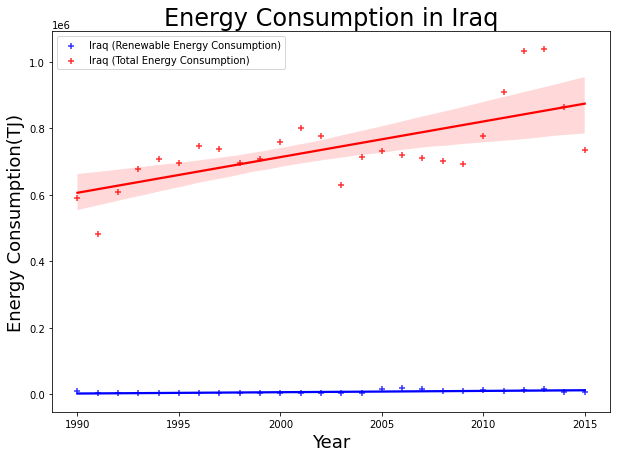

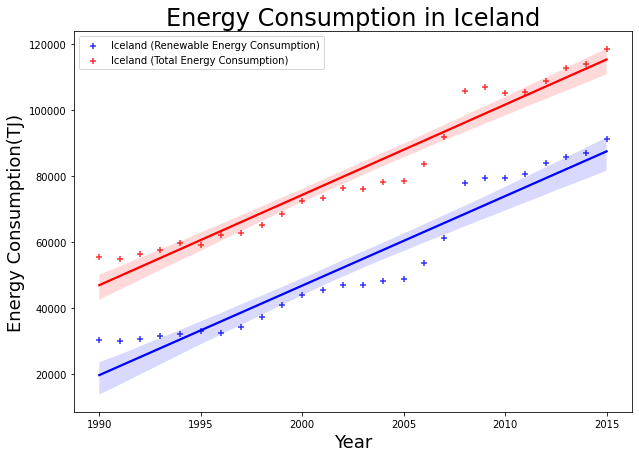

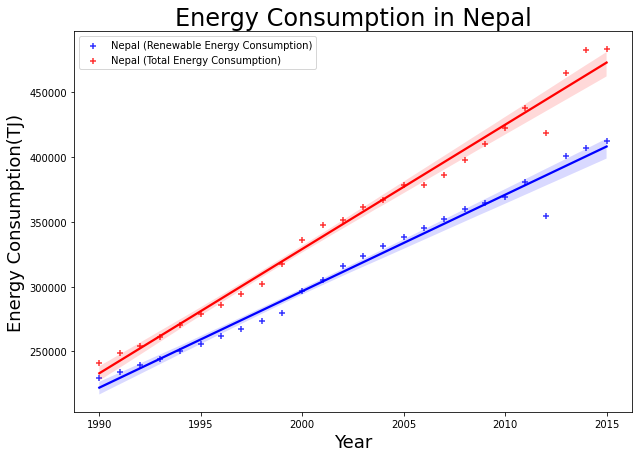

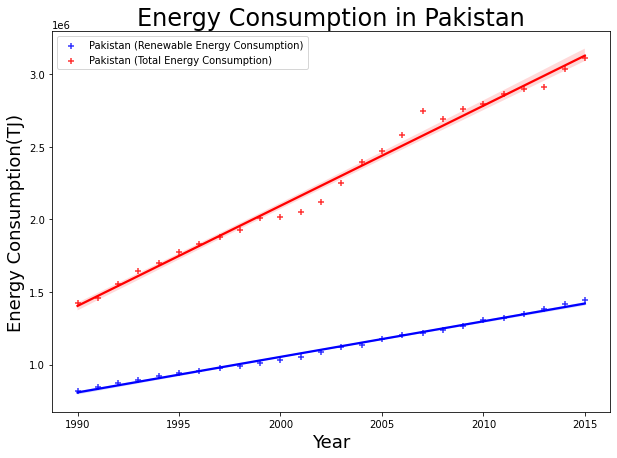

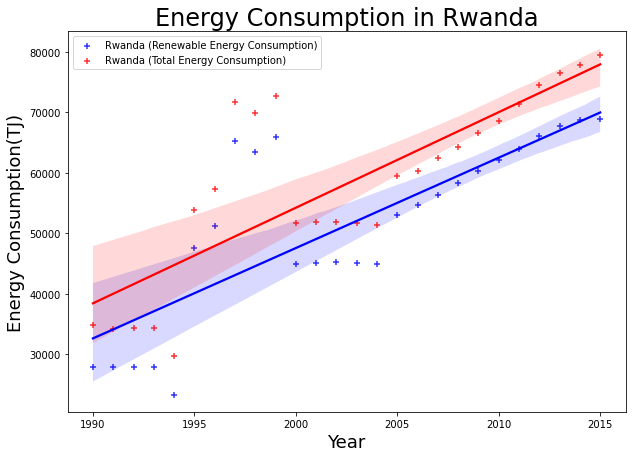

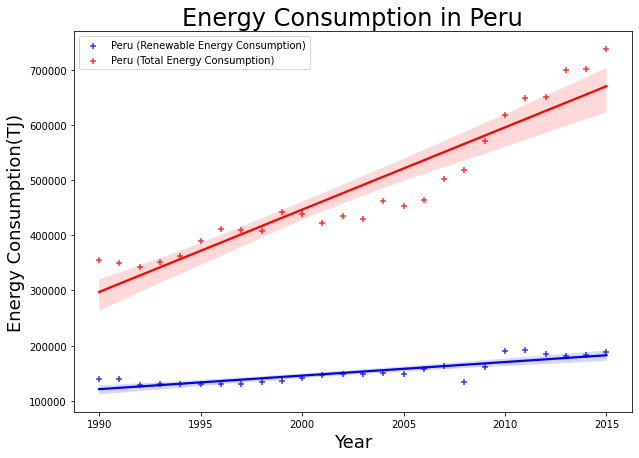

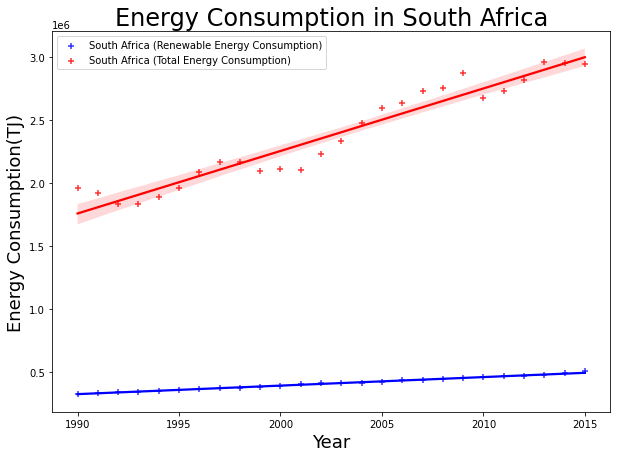

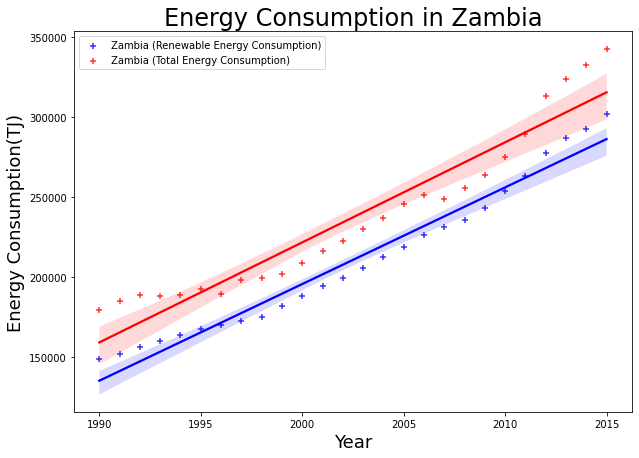

In [17]:
compare_renew_total_consumption_regression_plot(country_name='India', np_country_renew=np_India_renew[0], np_country_total=np_India_total[0], title='Energy Consumption in India', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='UK', np_country_renew=np_UK_renew[0], np_country_total=np_UK_total[0], title='Energy Consumption in UK', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='US', np_country_renew=np_USA_renew[0], np_country_total=np_USA_total[0], title='Energy Consumption in USA', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='France', np_country_renew=np_France_renew[0], np_country_total=np_France_total[0], title='Energy Consumption in France', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Mexico', np_country_renew=np_Mexico_renew[0], np_country_total=np_Mexico_total[0], title='Energy Consumption in Mexico', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Ghana', np_country_renew=np_Ghana_renew[0], np_country_total=np_Ghana_total[0], title='Energy Consumption in Ghana', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Iraq', np_country_renew=np_Iraq_renew[0], np_country_total=np_Iraq_total[0], title='Energy Consumption in Iraq', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Iceland', np_country_renew=np_Iceland_renew[0], np_country_total=np_Iceland_total[0], title='Energy Consumption in Iceland', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Nepal', np_country_renew=np_Nepal_renew[0], np_country_total=np_Nepal_total[0], title='Energy Consumption in Nepal', xlabel='Year', ylabel='Energy Consumption(TJ)',label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Pakistan', np_country_renew=np_Pakistan_renew[0], np_country_total=np_Pakistan_total[0], title='Energy Consumption in Pakistan', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Rwanda', np_country_renew=np_Rwanda_renew[0], np_country_total=np_Rwanda_total[0], title='Energy Consumption in Rwanda', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Peru', np_country_renew=np_Peru_renew[0], np_country_total=np_Peru_total[0], title='Energy Consumption in Peru', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='South Africa', np_country_renew=np_SA_renew[0], np_country_total=np_SA_total[0], title='Energy Consumption in South Africa', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Zambia', np_country_renew=np_Zambia_renew[0], np_country_total=np_Zambia_total[0], title='Energy Consumption in Zambia', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Renewable Energy Consumption)", label_total=" (Total Energy Consumption)")

# Plot distribution of energy in rural versus urban areas 

In [18]:
# Get all renew and total energies for all countries 
np_India_renew, np_UK_renew, np_France_renew, np_USA_renew, np_Pakistan_renew, np_Zambia_renew, np_SA_renew, np_Rwanda_renew, np_Peru_renew, np_Nepal_renew, np_Mexico_renew, np_Iraq_renew, np_Iceland_renew, np_Ghana_renew, np_India_total, np_UK_total, np_France_total, np_USA_total, np_Pakistan_total, np_Zambia_total, np_SA_total, np_Rwanda_total, np_Peru_total, np_Nepal_total, np_Mexico_total, np_Iraq_total, np_Iceland_total, np_Ghana_total = get_renew_total_consumption(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_renew='Access to electricity (% of rural population with access)',indicator_total='Access to electricity (% of urban population with access)')

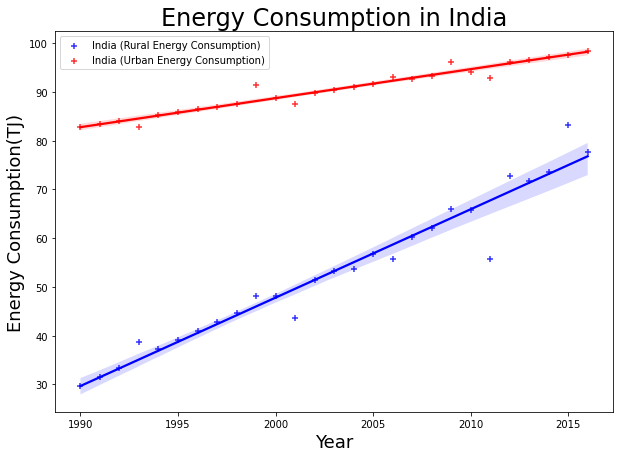

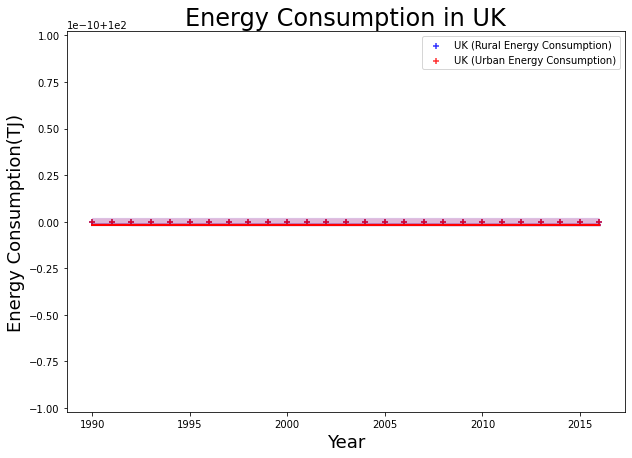

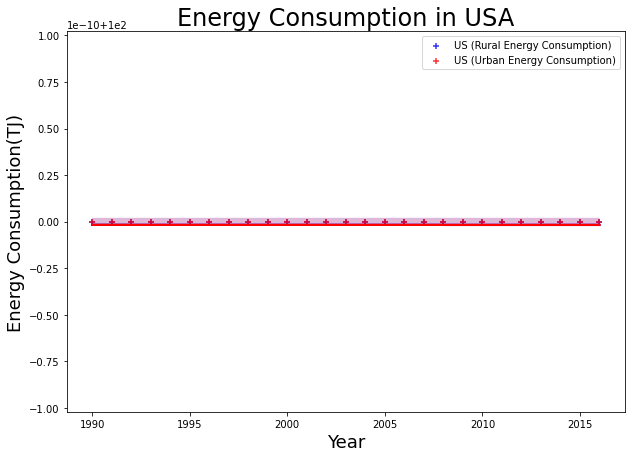

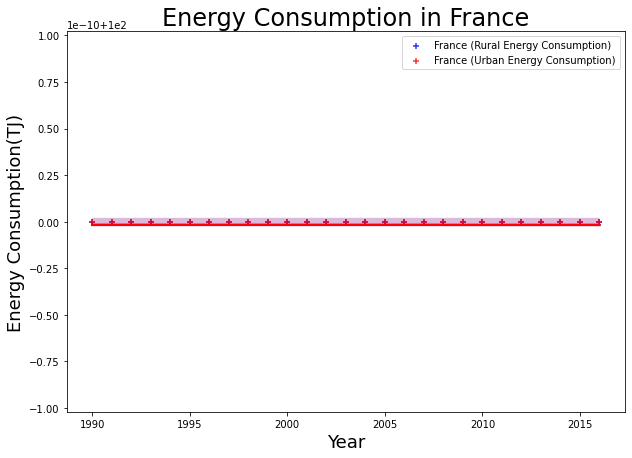

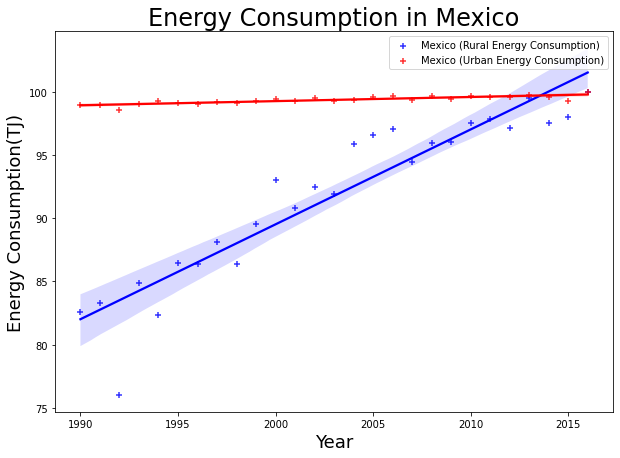

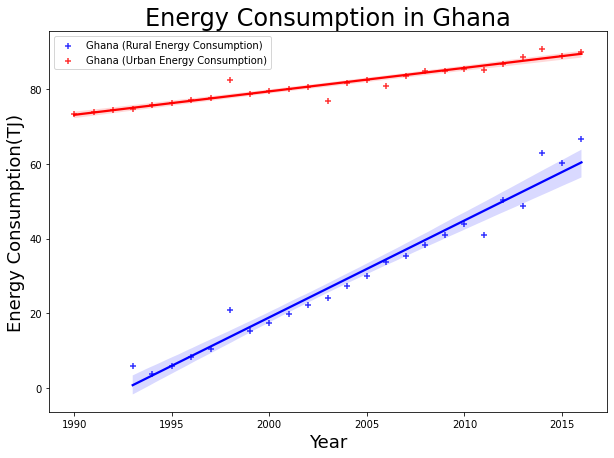

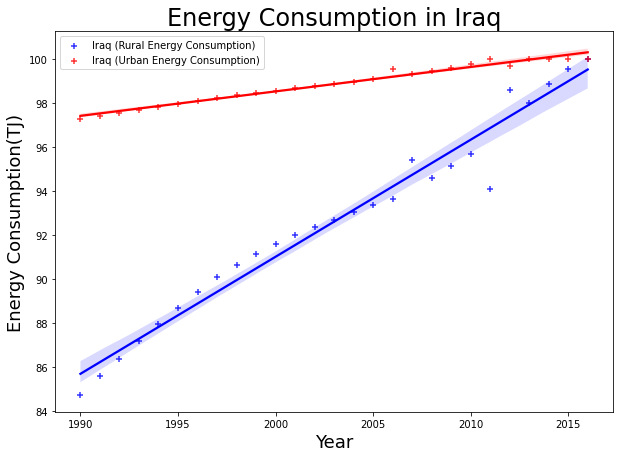

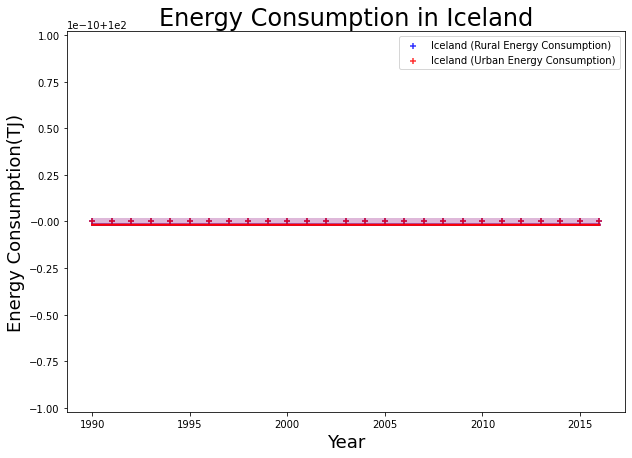

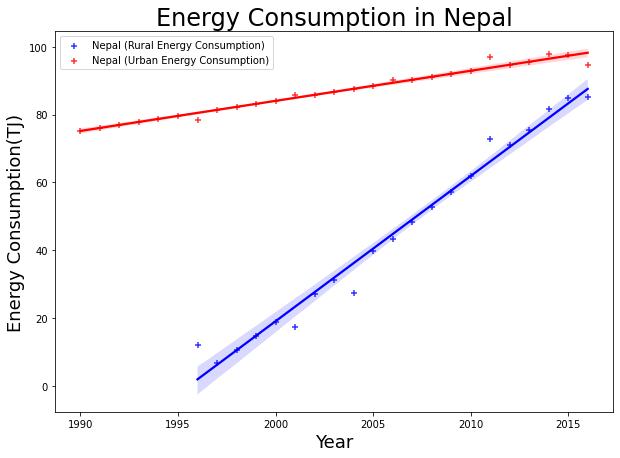

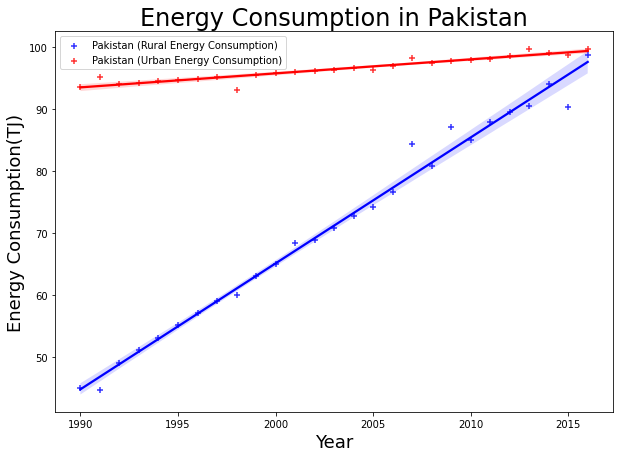

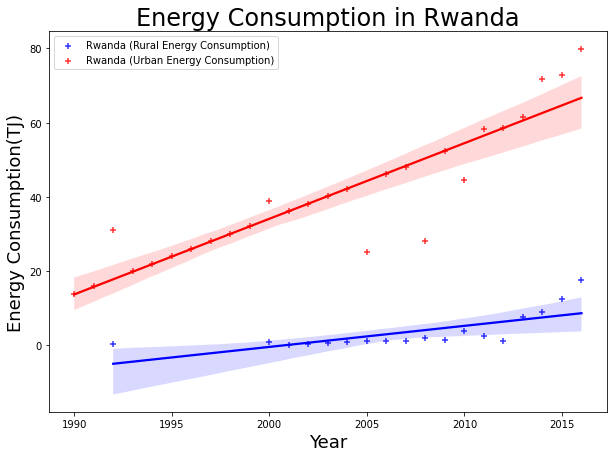

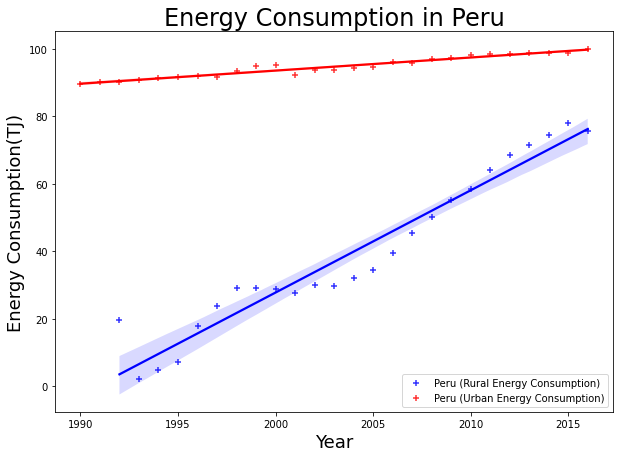

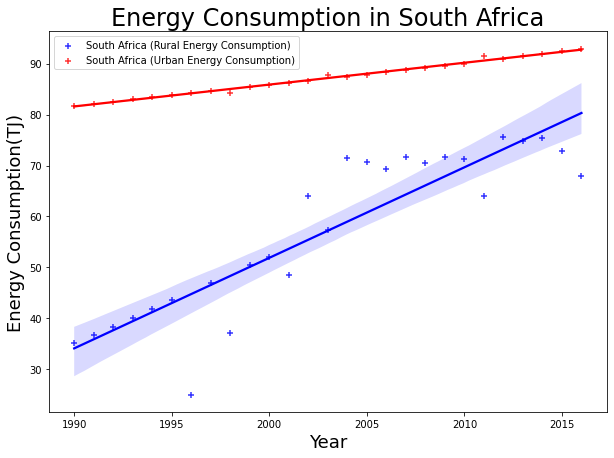

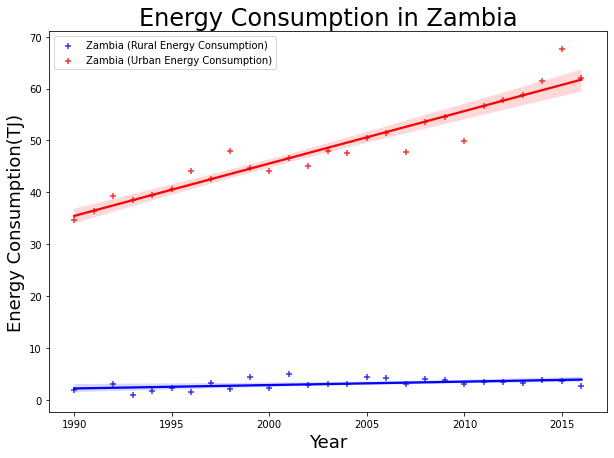

In [19]:
compare_renew_total_consumption_regression_plot(country_name='India', np_country_renew=np_India_renew[0], np_country_total=np_India_total[0], title='Energy Consumption in India', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='UK', np_country_renew=np_UK_renew[0], np_country_total=np_UK_total[0], title='Energy Consumption in UK', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='US', np_country_renew=np_USA_renew[0], np_country_total=np_USA_total[0], title='Energy Consumption in USA', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='France', np_country_renew=np_France_renew[0], np_country_total=np_France_total[0], title='Energy Consumption in France', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Mexico', np_country_renew=np_Mexico_renew[0], np_country_total=np_Mexico_total[0], title='Energy Consumption in Mexico', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Ghana', np_country_renew=np_Ghana_renew[0], np_country_total=np_Ghana_total[0], title='Energy Consumption in Ghana', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Iraq', np_country_renew=np_Iraq_renew[0], np_country_total=np_Iraq_total[0], title='Energy Consumption in Iraq', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Iceland', np_country_renew=np_Iceland_renew[0], np_country_total=np_Iceland_total[0], title='Energy Consumption in Iceland', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Nepal', np_country_renew=np_Nepal_renew[0], np_country_total=np_Nepal_total[0], title='Energy Consumption in Nepal', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Pakistan', np_country_renew=np_Pakistan_renew[0], np_country_total=np_Pakistan_total[0], title='Energy Consumption in Pakistan', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Rwanda', np_country_renew=np_Rwanda_renew[0], np_country_total=np_Rwanda_total[0], title='Energy Consumption in Rwanda', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Peru', np_country_renew=np_Peru_renew[0], np_country_total=np_Peru_total[0], title='Energy Consumption in Peru', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='South Africa', np_country_renew=np_SA_renew[0], np_country_total=np_SA_total[0], title='Energy Consumption in South Africa', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")
compare_renew_total_consumption_regression_plot(country_name='Zambia', np_country_renew=np_Zambia_renew[0], np_country_total=np_Zambia_total[0], title='Energy Consumption in Zambia', xlabel='Year', ylabel='Energy Consumption(TJ)', label_renew=" (Rural Energy Consumption)", label_total=" (Urban Energy Consumption)")

# Plot: GDP (value) and Energy Consumption in UK 
Research Question: What is the relation between energy consumption and economic growth?

In [20]:
def get_uk_gdp(path_to_gdp_uk):
  df_gdp = pd.read_csv(path_to_gdp_uk)
  np_uk_gdp = df_gdp['Gross Domestic Product: chained volume measures: Seasonally adjusted £m'][49:76].astype(float).to_numpy()
  return df_gdp, np_uk_gdp

In [21]:
def plot_gdp_value(x_time,np_uk_gdp):
  fig = plt.figure(figsize=(10, 7))
  sns.regplot(x=x_time, y=np_uk_gdp, color='blue', marker='+', label="UK - GDP")

  plt.legend()
  plt.title('United Kingdom: Gross Domestic Product', size=24)
  plt.xlabel('Year', size=18)
  plt.ylabel('Gross Domestic Product: Seasonally adjusted £m', size=18)
  plt.savefig("test3.png",dpi=100);

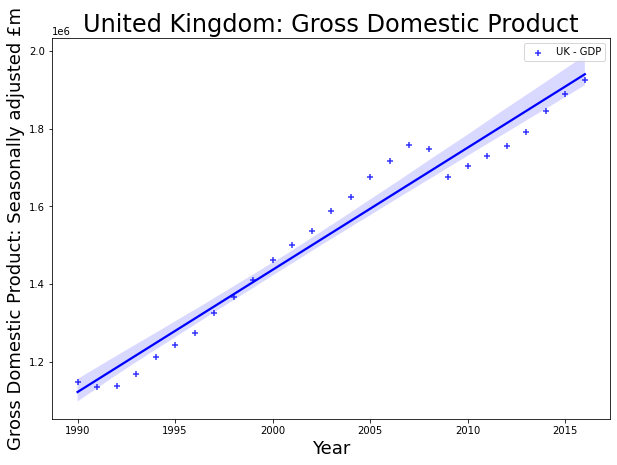

In [22]:
df_gdp, np_uk_gdp = get_uk_gdp(path_to_gdp_uk)
plot_gdp_value(x_time,np_uk_gdp)

In [23]:
def get_scaled_GDP_value_TE(np_uk_gdp, indicator_name='Total final energy consumption (TFEC) (TJ)'):
  np_UK_total = df_UK[df_UK['Indicator Name'] == indicator_name].drop(columns=["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"], axis=1).to_numpy()
  # Scaler 
  scaler = StandardScaler()
  scaled_GDP = scaler.fit_transform(np_uk_gdp.reshape(-1, 1))
  scaled_TE = scaler.fit_transform(np_UK_total.reshape(-1, 1))
  return scaled_GDP, scaled_TE


In [24]:
def plot_gdp_energy(x_time,country_name, scaled_GDP, scaled_TE, title="Gross Domestic Product and Total Energy Consumption", xlabel="Year", ylabel="Standardised Values", label_GDP=" GDP", label_TE=" TE"):
  fig = plt.figure(figsize=(10, 7))
  sns.regplot(x=x_time, y=scaled_GDP, color='blue', marker='+', label= country_name + label_GDP)
  sns.regplot(x=x_time, y=scaled_TE, color='red', marker='+', label= country_name + label_TE)
  plt.legend()
  plt.title(title, size=24)
  plt.xlabel(xlabel, size=18)
  plt.ylabel(ylabel, size=18)
  plt.savefig("test4.png",dpi=100);

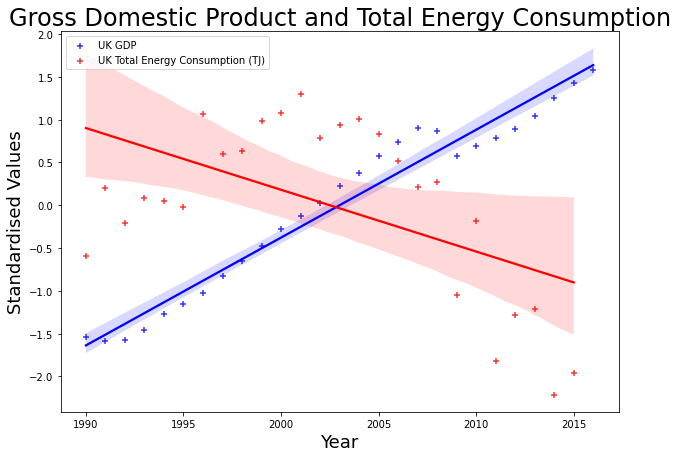

In [25]:
scaled_GDP, scaled_TE = get_scaled_GDP_value_TE(np_uk_gdp, indicator_name='Total final energy consumption (TFEC) (TJ)')
plot_gdp_energy(x_time,country_name="UK", scaled_GDP=scaled_GDP, scaled_TE=scaled_TE, title="Gross Domestic Product and Total Energy Consumption", xlabel="Year", ylabel="Standardised Values", label_GDP=" GDP", label_TE=" Total Energy Consumption (TJ)")


Further, as per the report, 

```
Empirical research suggests that investments in energy efficiency and renewable energy
have a positive impact on the economy, while at the same time minimising the environmental
damage. On the other hand, the use of energy subsidies has hampered energy sector
development. More research is required, however, on the impact of electricity market reform
on energy sector development. 
```

So let's plot renewable energy consumption with GDP - 

Source: https://assets.publishing.service.gov.uk/media/57a089bae5274a27b2000229/EoD_HD116_Jan2014_Energy_Economic_Growth.pdf

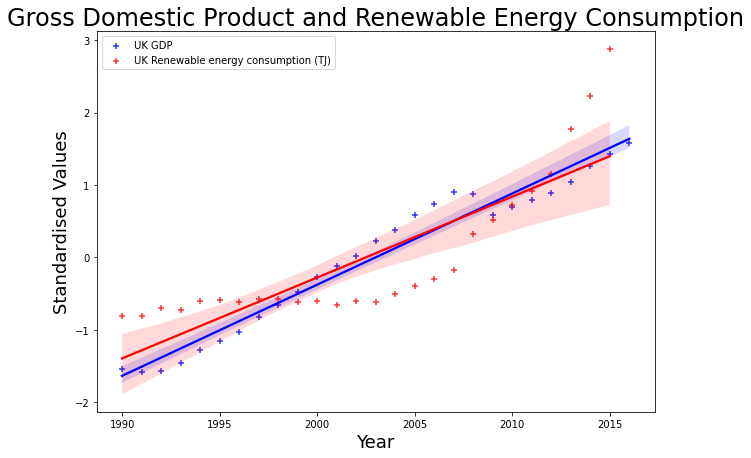

In [26]:
scaled_GDP, scaled_TE = get_scaled_GDP_value_TE(np_uk_gdp, indicator_name='Renewable energy consumption (TJ)')
plot_gdp_energy(x_time,country_name="UK", scaled_GDP=scaled_GDP, scaled_TE=scaled_TE, title="Gross Domestic Product and Renewable Energy Consumption", xlabel="Year", ylabel="Standardised Values", label_GDP=" GDP", label_TE=" Renewable energy consumption (TJ)")


This is an interesting plot. Wow. Why? Because there is a significant overlap between the growth of GDP and increasing use of renewable energy consumption.

# Plot: GDP growth rate of selected countries 

In [27]:
def get_world_gdp(path_to_gdp_rate_world):
  df_world_gdp = pd.read_csv(path_to_gdp_rate_world)
  # Extract Columns
  columns = df_world_gdp.iloc[3].tolist()
  columns[-1] = 'Empty'
  df_world_gdp.columns = columns

  # Dropped rows and cleaned 
  df_world_gdp_cleaned = df_world_gdp.drop([0,1,2,3]) 
  df_world_gdp_cleaned.to_csv("df_world_gdp_cleaned.csv")
  return df_world_gdp_cleaned


In [28]:
def filter_world_gdp_for_sustainable_energy_timescale():
  columns_to_be_dropped_list = ['Country Name','Country Code','Indicator Name','Indicator Code',  1960.0, 1961.0, 1962.0, 1963.0,
  1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0,1971.0, 1972.0,1973.0, 1974.0, 1975.0,1976.0, 1977.0,1978.0,1979.0, 1980.0,1981.0,
  1982.0,1983.0,1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,2017.0, 2018.0, 2019.0, 2020.0, 'Empty']
  return columns_to_be_dropped_list


In [29]:
def get_gdp_growth_rates_countries(df_world_gdp_cleaned, columns_to_be_dropped_list):
  np_India_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'India'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_UK_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'United Kingdom'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_France_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'France'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_USA_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'United States'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Pakistan_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Pakistan'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Zambia_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Zambia'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_SA_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Sub-Saharan Africa'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Rwanda_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Rwanda'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Peru_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Peru'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Nepal_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Nepal'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Mexico_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Mexico'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Iraq_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Iraq'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Iceland_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Iceland'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  np_Ghana_gdp = df_world_gdp_cleaned[df_world_gdp_cleaned['Country Name'] == 'Ghana'].drop(columns=columns_to_be_dropped_list, axis=1).to_numpy()
  return np_India_gdp, np_UK_gdp, np_France_gdp, np_USA_gdp, np_Pakistan_gdp, np_Zambia_gdp, np_SA_gdp, np_Rwanda_gdp, np_Peru_gdp, np_Nepal_gdp, np_Mexico_gdp, np_Iraq_gdp, np_Iceland_gdp, np_Ghana_gdp

In [30]:
def plot_all_gdp_rates(country_indicator_list, country_name_list, x_time):
  fig = plt.figure(figsize=(10, 7))
  for x in range(len(country_indicator_list)):
    sns.regplot(x=x_time, y=country_indicator_list[x], marker='+', label=country_name_list[x])
  plt.legend()
  plt.title('Gross Domestic Product (Growth Rate)', size=24)
  plt.xlabel('Year', size=18)
  plt.ylabel('Gross Domestic Product: (Growth Rate)', size=18)
  plt.savefig("test5.png",dpi=100);


In [31]:
# Get the dataframe for growth rates 
df_world_gdp_cleaned = get_world_gdp(path_to_gdp_rate_world)
# Extract the columns to be dropped for plotting and comparison with the other dataset 
columns_to_be_dropped_list = filter_world_gdp_for_sustainable_energy_timescale()

In [32]:
# get the gdp numpy lists for all countries 
np_India_gdp, np_UK_gdp, np_France_gdp, np_USA_gdp, np_Pakistan_gdp, np_Zambia_gdp, np_SA_gdp, np_Rwanda_gdp, np_Peru_gdp, np_Nepal_gdp, np_Mexico_gdp, np_Iraq_gdp, np_Iceland_gdp, np_Ghana_gdp = get_gdp_growth_rates_countries(df_world_gdp_cleaned, columns_to_be_dropped_list)

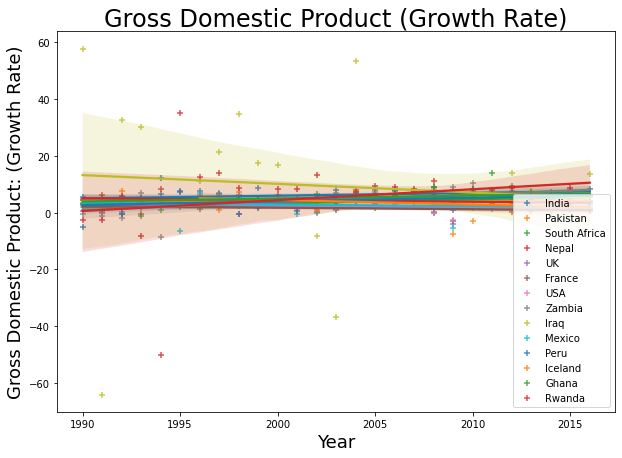

In [33]:
# Plotting for "India", "Pakistan", "South Africa", "Nepal", "UK", "France", "Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana"
country_indicator_list = [np_India_gdp[0], np_Pakistan_gdp[0], np_SA_gdp[0], np_Nepal_gdp[0], np_UK_gdp[0], np_France_gdp[0], np_USA_gdp[0],
                          np_Zambia_gdp[0], np_Iraq_gdp[0], np_Mexico_gdp[0], np_Peru_gdp[0], np_Iceland_gdp[0], np_Ghana_gdp[0], np_Rwanda_gdp[0]]
country_name_list = ["India", "Pakistan", "South Africa", "Nepal", "UK", "France", "USA",
                     "Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana", "Rwanda"]

plot_all_gdp_rates(country_indicator_list, country_name_list, x_time)

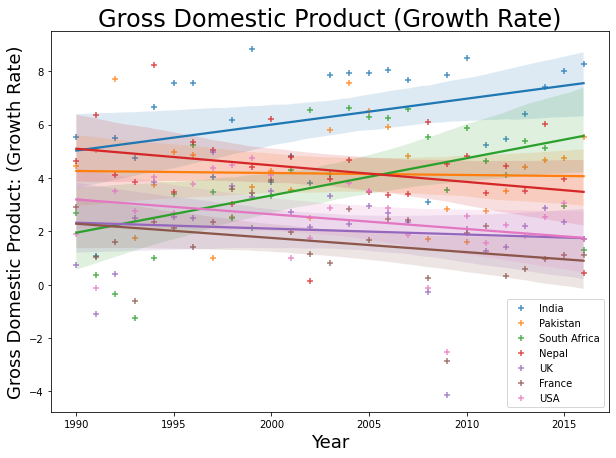

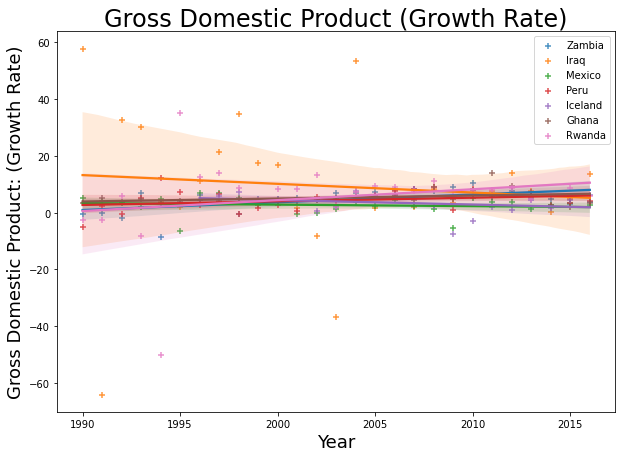

In [34]:
# Plotting for "India", "Pakistan", "South Africa", "Nepal", "UK", "France", "Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana"
country_indicator_list1 = [np_India_gdp[0], np_Pakistan_gdp[0], np_SA_gdp[0], np_Nepal_gdp[0], np_UK_gdp[0], np_France_gdp[0], np_USA_gdp[0]] 
country_indicator_list2 = [np_Zambia_gdp[0], np_Iraq_gdp[0], np_Mexico_gdp[0], np_Peru_gdp[0], np_Iceland_gdp[0], np_Ghana_gdp[0], np_Rwanda_gdp[0]]
country_name_list1 = ["India", "Pakistan", "South Africa", "Nepal", "UK", "France", "USA"]
country_name_list2 = ["Zambia", "Iraq", "Mexico", "Peru", "Iceland", "Ghana", "Rwanda"]
plot_all_gdp_rates(country_indicator_list1, country_name_list1, x_time)
plot_all_gdp_rates(country_indicator_list2, country_name_list2, x_time)

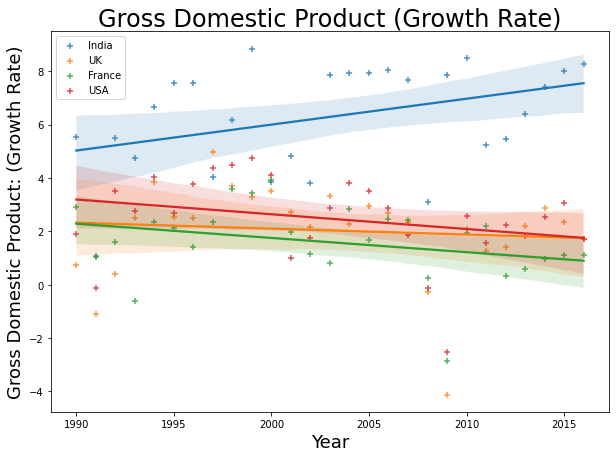

In [35]:
# Plotting for "India", ""UK", "France", "USA"
country_indicator_list1 = [np_India_gdp[0], np_UK_gdp[0], np_France_gdp[0], np_USA_gdp[0]] 
country_name_list1 = ["India", "UK", "France", "USA"]
plot_all_gdp_rates(country_indicator_list1, country_name_list1, x_time)

# Plot: GDP versus Energy Parameters for all countries 

In [36]:
# get the gdp growth rate numpy lists for all countries 
np_India_gdp, np_UK_gdp, np_France_gdp, np_USA_gdp, np_Pakistan_gdp, np_Zambia_gdp, np_SA_gdp, np_Rwanda_gdp, np_Peru_gdp, np_Nepal_gdp, np_Mexico_gdp, np_Iraq_gdp, np_Iceland_gdp, np_Ghana_gdp = get_gdp_growth_rates_countries(df_world_gdp_cleaned, columns_to_be_dropped_list)

In [37]:
# Access to electicity in %
np_India, np_UK, np_France, np_USA, np_Pakistan, np_Zambia, np_SA, np_Rwanda, np_Peru, np_Nepal, np_Mexico, np_Iraq, np_Iceland, np_Ghana = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name='Access to electricity (% of total population)', se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])

In [38]:
def get_standardised_values(np_country_gdp, np_country_energy):
  scaler = StandardScaler()
  scaled_GDP = scaler.fit_transform(np_country_gdp.reshape(-1, 1))
  scaled_TE = scaler.fit_transform(np_country_energy.reshape(-1, 1))
  return scaled_GDP,scaled_TE

In [39]:
def plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name, label_GDP="Growth Rate", label_TE="Accesible Electricity"):
  fig = plt.figure(figsize=(10, 7))
  sns.regplot(x=x_time, y=scaled_GDP, color='blue', marker='+', label= country_name + label_GDP)
  sns.regplot(x=x_time, y=scaled_TE, color='red', marker='+', label= country_name + label_TE)
  plt.legend()
  plt.title('Gross Domestic Product and Energy Parameters', size=24)
  plt.xlabel('Year', size=18)
  plt.ylabel('Standardised Features', size=18)
  plt.savefig("test6.png",dpi=100);

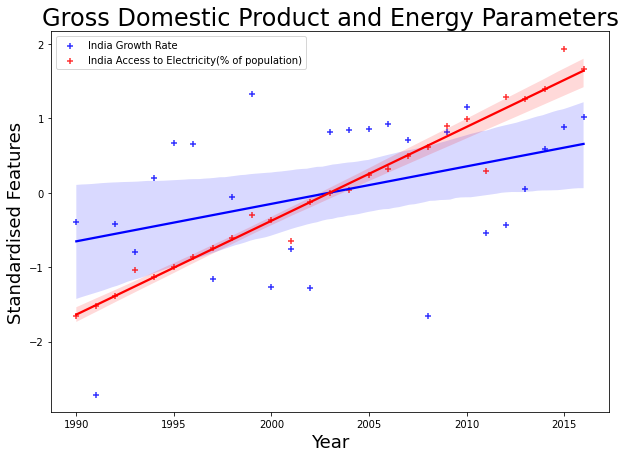

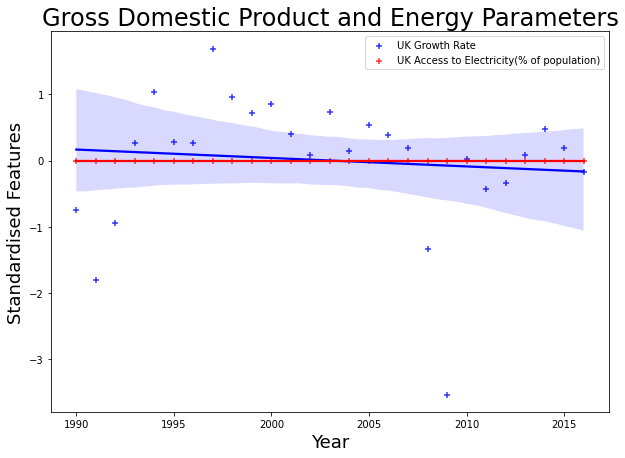

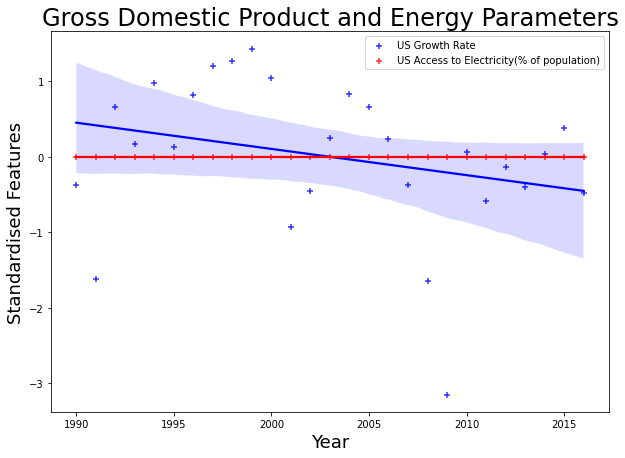

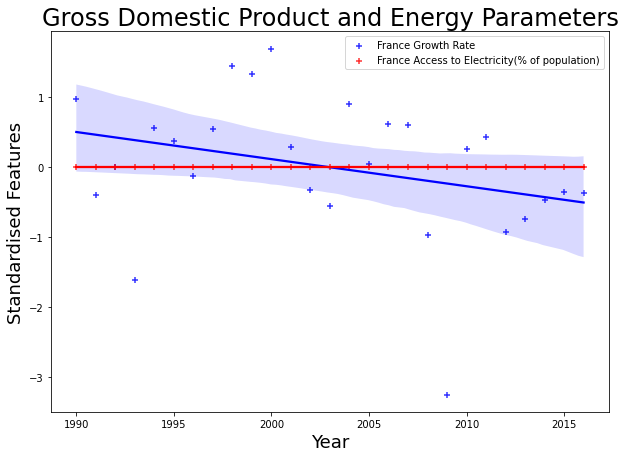

In [40]:
scaled_GDP, scaled_TE = get_standardised_values(np_India_gdp,np_India)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="India", label_GDP=" Growth Rate", label_TE=" Access to Electricity(% of population)")

scaled_GDP, scaled_TE = get_standardised_values(np_UK_gdp, np_UK)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="UK", label_GDP=" Growth Rate", label_TE=" Access to Electricity(% of population)")

scaled_GDP, scaled_TE = get_standardised_values(np_USA_gdp, np_USA)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="US", label_GDP=" Growth Rate", label_TE=" Access to Electricity(% of population)")

scaled_GDP, scaled_TE = get_standardised_values(np_France_gdp, np_France)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="France", label_GDP=" Growth Rate", label_TE=" Access to Electricity(% of population)")


In [41]:
# 'Total final energy consumption (TFEC) (TJ)'
np_India, np_UK, np_France, np_USA, np_Pakistan, np_Zambia, np_SA, np_Rwanda, np_Peru, np_Nepal, np_Mexico, np_Iraq, np_Iceland, np_Ghana = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name='Total final energy consumption (TFEC) (TJ)', se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])

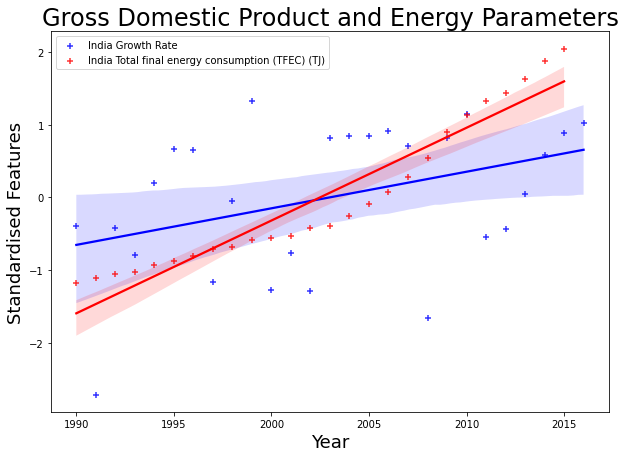

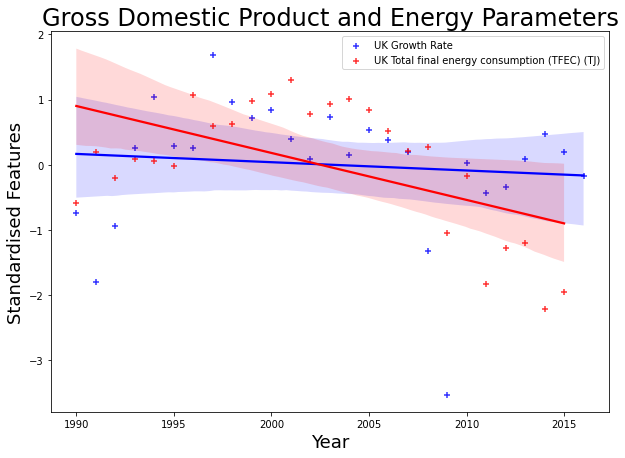

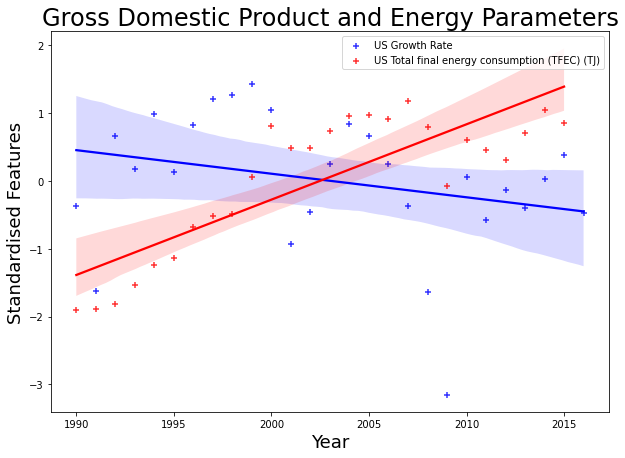

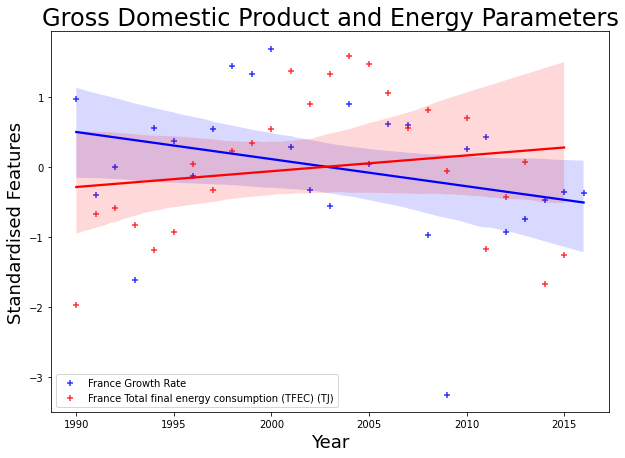

In [42]:
scaled_GDP, scaled_TE = get_standardised_values(np_India_gdp,np_India)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="India", label_GDP=" Growth Rate", label_TE=' Total final energy consumption (TFEC) (TJ)')

scaled_GDP, scaled_TE = get_standardised_values(np_UK_gdp, np_UK)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="UK", label_GDP=" Growth Rate", label_TE=' Total final energy consumption (TFEC) (TJ)')

scaled_GDP, scaled_TE = get_standardised_values(np_USA_gdp, np_USA)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="US", label_GDP=" Growth Rate", label_TE=' Total final energy consumption (TFEC) (TJ)')

scaled_GDP, scaled_TE = get_standardised_values(np_France_gdp, np_France)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="France", label_GDP=" Growth Rate", label_TE=' Total final energy consumption (TFEC) (TJ)')


In [43]:
# 'Renewable energy consumption (TJ)'
np_India, np_UK, np_France, np_USA, np_Pakistan, np_Zambia, np_SA, np_Rwanda, np_Peru, np_Nepal, np_Mexico, np_Iraq, np_Iceland, np_Ghana = get_np_all_countries(df_India, df_UK, df_France, df_USA, df_Pakistan, df_Zambia, df_SA, df_Rwanda, df_Peru, df_Nepal, df_Mexico, df_Iraq, df_Iceland, df_Ghana, indicator_name='Renewable energy consumption (TJ)', se_columns_dropped_list = ["Country Name",	"Country Code",	"Indicator Name",	"Indicator Code", "Unnamed: 31"])

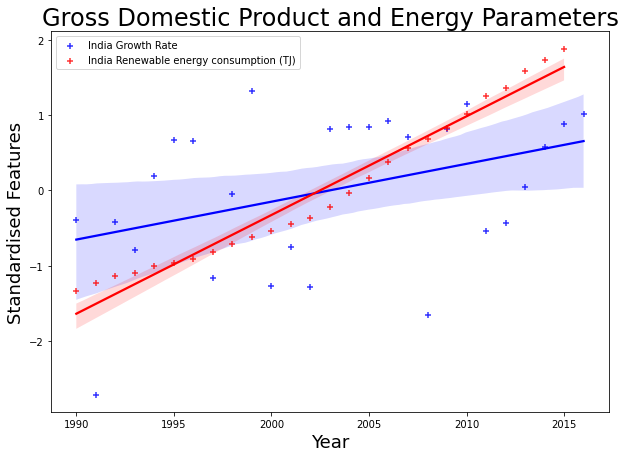

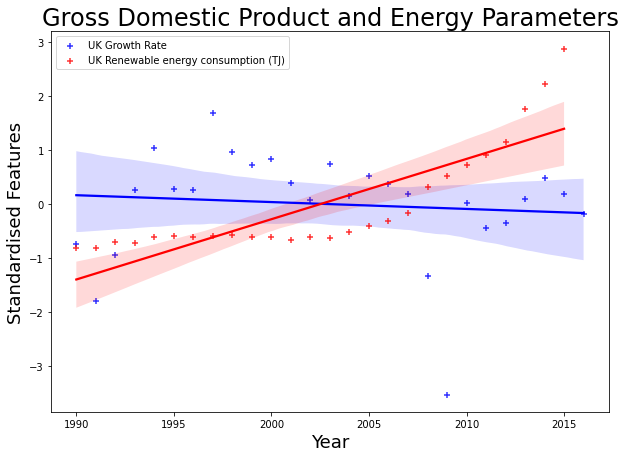

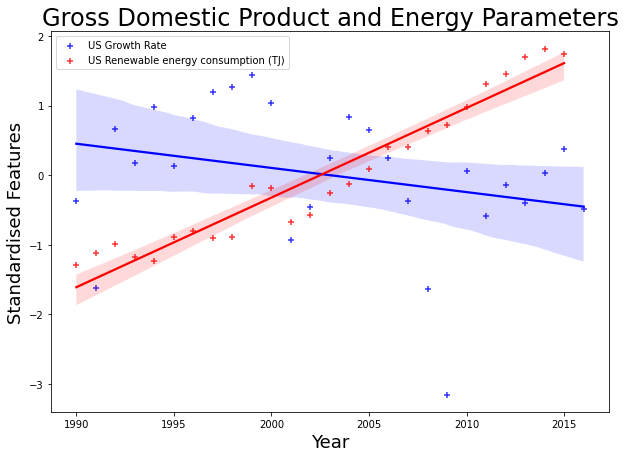

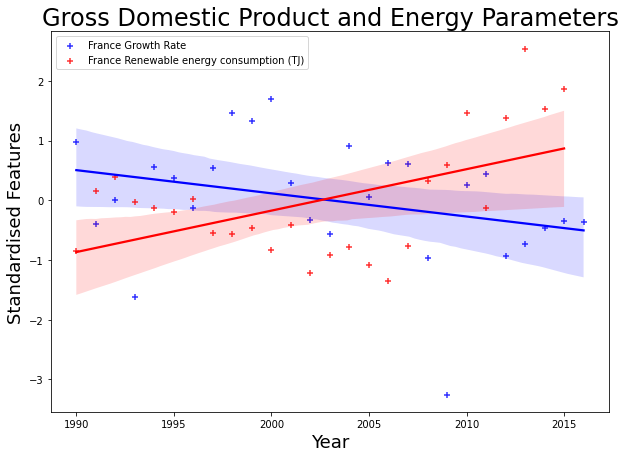

In [44]:
scaled_GDP, scaled_TE = get_standardised_values(np_India_gdp,np_India)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="India", label_GDP=" Growth Rate", label_TE=' Renewable energy consumption (TJ)')

scaled_GDP, scaled_TE = get_standardised_values(np_UK_gdp, np_UK)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="UK", label_GDP=" Growth Rate", label_TE=' Renewable energy consumption (TJ)')

scaled_GDP, scaled_TE = get_standardised_values(np_USA_gdp, np_USA)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="US", label_GDP=" Growth Rate", label_TE=' Renewable energy consumption (TJ)')

scaled_GDP, scaled_TE = get_standardised_values(np_France_gdp, np_France)
plot_country_gdp_energy(x_time,scaled_GDP,scaled_TE, country_name="France", label_GDP=" Growth Rate", label_TE=' Renewable energy consumption (TJ)')


There are many emperical resulsts between economic growth and energy consumption in literature, however, there is no clear relationship between the parameters. 

# Publish the figure as webpage 

As the figures have been saved you can directly embed them as an image inside the <img> tag and allow users to view it. 